In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import plotly.express as px
import pyvista as pv

In [60]:
# data = pd.read_parquet("/Users/arvinprince/pytorch-files/Google ASL/data/450474571.parquet")
data = pd.read_parquet("/Users/arvinprince/pytorch-files/Google ASL/data/296317215.parquet")

In [71]:
data.head()

,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1494438637,0,0.558159,0.550603,0.554162,0.543828,0.551478,0.555103,0.566358,0.455327,0.572389,...,-0.124966,-0.113680,-0.103391,-0.118710,-0.091068,-0.071286,-0.095167,-0.091655,-0.064835,-0.046677
1494438637,1,0.559157,0.550627,0.554241,0.543452,0.551426,0.554883,0.565622,0.455519,0.571343,...,-0.101074,-0.092762,-0.083472,-0.102874,-0.077500,-0.058431,-0.076877,-0.079398,-0.056055,-0.039821
1494438637,2,0.555381,0.551183,0.554637,0.543676,0.551955,0.555277,0.565502,0.454227,0.570983,...,-0.139371,-0.124513,-0.095812,-0.131984,-0.104427,-0.075522,-0.096968,-0.116063,-0.090169,-0.064778
1494438637,3,0.557249,0.550174,0.553681,0.542862,0.550985,0.554343,0.564671,0.454935,0.570286,...,-0.187725,-0.179453,-0.133177,-0.173193,-0.143141,-0.115510,-0.135543,-0.150484,-0.123912,-0.102089
1494438637,4,0.557520,0.551252,0.554584,0.543844,0.552108,0.555526,0.566051,0.454531,0.571771,...,-0.167483,-0.152804,-0.127324,-0.171816,-0.133314,-0.097499,-0.145111,-0.160346,-0.122395,-0.090545


In [72]:
data.shape

(165396, 1630)

In [45]:
columns = data.columns

In [46]:
xy_cols = [z for z in columns if z[0] != "z"]

In [47]:
rel_data = data.loc[:, xy_cols]

In [84]:
rel_data.tail(10)

,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,y_right_hand_11,y_right_hand_12,y_right_hand_13,y_right_hand_14,y_right_hand_15,y_right_hand_16,y_right_hand_17,y_right_hand_18,y_right_hand_19,y_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1526914806,16,0.628096,0.607190,0.617060,0.590756,0.604531,0.604806,0.608326,0.490017,0.605861,...,0.560328,0.588353,0.578202,0.549492,0.580044,0.616720,0.585198,0.564272,0.589415,0.623623
1526914806,17,0.625685,0.606445,0.616005,0.590096,0.603879,0.604262,0.607819,0.487516,0.605483,...,0.536324,0.560667,0.586969,0.525712,0.541351,0.574017,0.593945,0.560917,0.575364,0.602336
1526914806,18,0.622449,0.600471,0.612042,0.584837,0.597438,0.597958,0.602832,0.485754,0.600348,...,0.582121,0.595837,0.577273,0.561114,0.581180,0.596843,0.581287,0.563777,0.572110,0.583592
1526914806,19,0.623811,0.600433,0.611117,0.584328,0.597561,0.597953,0.602048,0.486162,0.599153,...,0.438868,0.396643,0.555969,0.508965,0.479186,0.448114,0.570953,0.562327,0.568701,0.572664
1526914806,20,0.622976,0.598376,0.610306,0.582398,0.595274,0.595746,0.600374,0.485546,0.597782,...,0.444317,0.401175,0.555967,0.513951,0.480657,0.443326,0.574836,0.569277,0.578354,0.583489
1526914806,21,0.624968,0.601828,0.613134,0.584665,0.598615,0.598639,0.601817,0.485715,0.598674,...,0.455660,0.414700,0.562348,0.519160,0.482939,0.442653,0.581118,0.579752,0.594738,0.607534
1526914806,22,0.625419,0.600639,0.612149,0.583449,0.597381,0.597452,0.600733,0.484653,0.597434,...,0.441650,0.390110,0.575549,0.531333,0.489695,0.443847,0.592654,0.590704,0.610925,0.621447
1526914806,23,0.623085,0.601933,0.613573,0.584334,0.598594,0.598520,0.601459,0.485252,0.598051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1526914806,24,0.622971,0.598565,0.610871,0.582462,0.595380,0.595950,0.600882,0.484743,0.598267,...,0.489388,0.452785,0.580639,0.543474,0.509568,0.471762,0.601225,0.605032,0.624141,0.640618


In [222]:
# contour = dict(rel_data.iloc[0,:])
contour = dict(data.iloc[4917,:])

x_contour = [contour[x] for x in contour.keys() if x[0] == "x"]
y_contour = [contour[y] for y in contour.keys() if y[0] == "y"]
z_contour = [contour[z] for z in contour.keys() if z[0] == "z"]

# xy_contour = tuple(zip(x_contour, y_contour))
xyz_contour = tuple(zip(x_contour, y_contour, z_contour))

plt.figure(figsize= (7,7))
# plt.scatter(x_contour, y_contour,s=4)
fig = px.scatter_3d(x= x_contour, y= y_contour, z= z_contour)
fig.update_traces(marker_size=4)
fig.show()
# plt.show()

<Figure size 700x700 with 0 Axes>

In [245]:
contour = dict(data.iloc[4917,:])

x_contour_f = [contour[x] for x in contour.keys() if x[:3] == "x_f"]
y_contour_f = [contour[y] for y in contour.keys() if y[:3] == "y_f"]
z_contour_f = [contour[z] for z in contour.keys() if z[:3] == "z_f"]
contour_3d_params = {"x":x_contour_f, 
                    "y":y_contour_f, 
                    "z":z_contour_f}

fig = plt.figure(figsize=(7,5))
# ax = plt.scatter(y_contour, x_contour,s=9)
ax = px.scatter_3d(**contour_3d_params)
ax.update_traces(marker_size=4)
ax.show()
# plt.show()

mesh_cords = list(zip(y_contour_f, x_contour_f, z_contour_f))

<Figure size 700x500 with 0 Axes>

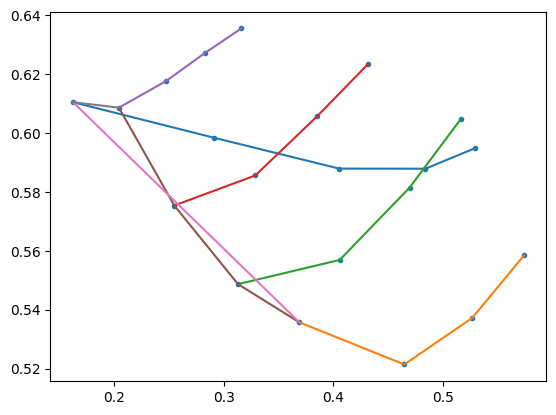

In [175]:
contour = dict(data.iloc[4917,:])
x_contour_rh = [(contour[x], x) for x in contour.keys() if x[:3] == "x_r"]
y_contour_rh = [(contour[y], y) for y in contour.keys() if y[:3] == "y_r"]

plt.scatter(x = [i[0] for i in x_contour_rh], y = [j[0] for j in y_contour_rh],s=9)

plt.plot([i[0] for i in x_contour_rh if 0 <= int(i[1][13:]) <= 4],
         [j[0] for j in y_contour_rh if 0 <= int(j[1][13:]) <= 4]
        )
plt.plot([i[0] for i in x_contour_rh if 5 <= int(i[1][13:]) <= 8],
         [j[0] for j in y_contour_rh if 5 <= int(j[1][13:]) <= 8]
        )
plt.plot([i[0] for i in x_contour_rh if 9 <= int(i[1][13:]) <= 12],
         [j[0] for j in y_contour_rh if 9 <= int(j[1][13:]) <= 12]
        )
plt.plot([i[0] for i in x_contour_rh if 13 <= int(i[1][13:]) <= 16],
         [j[0] for j in y_contour_rh if 13 <= int(j[1][13:]) <= 16]
        )
plt.plot([i[0] for i in x_contour_rh if 17 <= int(i[1][13:]) <= 20],
         [j[0] for j in y_contour_rh if 17 <= int(j[1][13:]) <= 20]
        )
plt.plot([i[0] for i in x_contour_rh if int(i[1][13:]) in range(5, 18, 4)],
         [j[0] for j in y_contour_rh if int(j[1][13:]) in range(5, 18, 4)]
        )
plt.plot([i[0] for i in x_contour_rh if int(i[1][13:]) in (0, 5)],
         [j[0] for j in y_contour_rh if int(j[1][13:]) in (0, 5)]
        )
plt.plot([i[0] for i in x_contour_rh if int(i[1][13:]) in (0, 17)],
         [j[0] for j in y_contour_rh if int(j[1][13:]) in (0, 17)]
        )

plt.show()
# fig = px.scatter_3d(x = x_contour_rh, y=y_contour_rh, z = z_contour)
# fig.show()

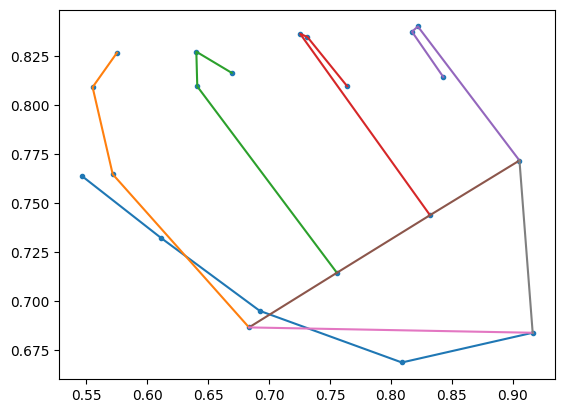

In [179]:
contour = dict(data.iloc[4917,:])
x_contour_lh= [(contour[x], x) for x in contour.keys() if x[:3] == "x_l"]
y_contour_lh = [(contour[y], y) for y in contour.keys() if y[:3] == "y_l"]

plt.scatter(x = [i[0] for i in x_contour_lh], 
            y = [j[0] for j in y_contour_lh],
            s=9
           )

plt.plot([i[0] for i in x_contour_lh if 0 <= int(i[1][12:]) <= 4],
         [j[0] for j in y_contour_lh if 0 <= int(j[1][12:]) <= 4]
        )
plt.plot([i[0] for i in x_contour_lh if 5 <= int(i[1][12:]) <= 8],
         [j[0] for j in y_contour_lh if 5 <= int(j[1][12:]) <= 8]
        )
plt.plot([i[0] for i in x_contour_lh if 9 <= int(i[1][12:]) <= 12],
         [j[0] for j in y_contour_lh if 9 <= int(j[1][12:]) <= 12]
        )
plt.plot([i[0] for i in x_contour_lh if 13 <= int(i[1][12:]) <= 16],
         [j[0] for j in y_contour_lh if 13 <= int(j[1][12:]) <= 16]
        )
plt.plot([i[0] for i in x_contour_lh if 17 <= int(i[1][12:]) <= 20],
         [j[0] for j in y_contour_lh if 17 <= int(j[1][12:]) <= 20]
        )
plt.plot([i[0] for i in x_contour_lh if int(i[1][12:]) in range(5, 18, 4)],
         [j[0] for j in y_contour_lh if int(j[1][12:]) in range(5, 18, 4)]
        )
plt.plot([i[0] for i in x_contour_lh if int(i[1][12:]) in (0, 5)],
         [j[0] for j in y_contour_lh if int(j[1][12:]) in (0, 5)]
        )
plt.plot([i[0] for i in x_contour_lh if int(i[1][12:]) in (0, 17)],
         [j[0] for j in y_contour_lh if int(j[1][12:]) in (0, 17)]
        )

plt.show()
# fig = px.scatter_3d(x = x_contour_lh, y=y_contour_lh, z = z_contour)
# fig.show()

In [213]:
contour = dict(data.iloc[4917,:])
x_contour_lh= [(contour[x], x) for x in contour.keys() if x[:3] == "x_l"]
y_contour_lh = [(contour[y], y) for y in contour.keys() if y[:3] == "y_l"]
z_contour_lh = [(contour[z], z) for z in contour.keys() if z[:3] == "z_l"]

ax = px.line_3d(x = [i[0] for i in x_contour_lh if 0 <= int(i[1][12:]) <= 4],
                y = [j[0] for j in y_contour_lh if 0 <= int(j[1][12:]) <= 4],
                z= [k[0] for k in z_contour_lh if 0 <= int(k[1][12:]) <= 4],
                markers=True,
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_lh if 5 <= int(i[1][12:]) <= 8],
         y= [j[0] for j in y_contour_lh if 5 <= int(j[1][12:]) <= 8],
         z=[k[0] for k in z_contour_lh if 5 <= int(k[1][12:]) <= 8]
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_lh if 9 <= int(i[1][12:]) <=12],
         y= [j[0] for j in y_contour_lh if 9 <= int(j[1][12:]) <=12],
         z=[k[0] for k in z_contour_lh if 9 <= int(k[1][12:]) <= 12]
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_lh if 13 <= int(i[1][12:]) <=16],
         y= [j[0] for j in y_contour_lh if 13 <= int(j[1][12:]) <=16],
         z=[k[0] for k in z_contour_lh if 13 <= int(k[1][12:]) <= 16]
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_lh if 17 <= int(i[1][12:]) <=20],
         y= [j[0] for j in y_contour_lh if 17 <= int(j[1][12:]) <=20],
         z=[k[0] for k in z_contour_lh if 17 <= int(k[1][12:]) <=20]
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_lh if int(i[1][12:]) in range(5, 18, 4)],
         y=[j[0] for j in y_contour_lh if int(j[1][12:]) in range(5, 18, 4)],
         z=[k[0] for k in z_contour_lh if int(k[1][12:]) in range(5, 18, 4)],
                )
ax.add_scatter3d(x=[i[0] for i in x_contour_lh if int(i[1][12:]) in (0, 5)],
         y=[j[0] for j in y_contour_lh if int(j[1][12:]) in (0, 5)],
         z =[k[0] for k in z_contour_lh if int(k[1][12:]) in (0, 5)],
        )
ax.add_scatter3d(x=[i[0] for i in x_contour_lh if int(i[1][12:]) in (0, 17)],
         y=[j[0] for j in y_contour_lh if int(j[1][12:]) in (0, 17)],
         z =[k[0] for k in z_contour_lh if int(k[1][12:]) in (0, 17)],
        )

ax.show()

In [215]:
contour = dict(data.iloc[4917,:])
x_contour_rh= [(contour[x], x) for x in contour.keys() if x[:3] == "x_r"]
y_contour_rh = [(contour[y], y) for y in contour.keys() if y[:3] == "y_r"]
z_contour_rh = [(contour[z], z) for z in contour.keys() if z[:3] == "z_r"]

ax = px.line_3d(x = [i[0] for i in x_contour_rh if 0 <= int(i[1][13:]) <= 4],
                y = [j[0] for j in y_contour_rh if 0 <= int(j[1][13:]) <= 4],
                z= [k[0] for k in z_contour_rh if 0 <= int(k[1][13:]) <= 4],
                markers=True,
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_rh if 5 <= int(i[1][13:]) <= 8],
         y= [j[0] for j in y_contour_rh if 5 <= int(j[1][13:]) <= 8],
         z=[k[0] for k in z_contour_rh if 5 <= int(k[1][13:]) <= 8]
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_rh if 9 <= int(i[1][13:]) <=12],
         y= [j[0] for j in y_contour_rh if 9 <= int(j[1][13:]) <=12],
         z=[k[0] for k in z_contour_rh if 9 <= int(k[1][13:]) <= 12]
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_rh if 13 <= int(i[1][13:]) <=16],
         y= [j[0] for j in y_contour_rh if 13 <= int(j[1][13:]) <=16],
         z=[k[0] for k in z_contour_rh if 13 <= int(k[1][13:]) <= 16]
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_rh if 17 <= int(i[1][13:]) <=20],
         y= [j[0] for j in y_contour_rh if 17 <= int(j[1][13:]) <=20],
         z=[k[0] for k in z_contour_rh if 17 <= int(k[1][13:]) <=20]
                )
ax.add_scatter3d(x =[i[0] for i in x_contour_rh if int(i[1][13:]) in range(5, 18, 4)],
         y=[j[0] for j in y_contour_rh if int(j[1][13:]) in range(5, 18, 4)],
         z=[k[0] for k in z_contour_rh if int(k[1][13:]) in range(5, 18, 4)],
                )
ax.add_scatter3d(x=[i[0] for i in x_contour_rh if int(i[1][13:]) in (0, 5)],
         y=[j[0] for j in y_contour_rh if int(j[1][13:]) in (0, 5)],
         z =[k[0] for k in z_contour_rh if int(k[1][13:]) in (0, 5)],
        )
ax.add_scatter3d(x=[i[0] for i in x_contour_rh if int(i[1][13:]) in (0, 17)],
         y=[j[0] for j in y_contour_rh if int(j[1][13:]) in (0, 17)],
         z =[k[0] for k in z_contour_rh if int(k[1][13:]) in (0, 17)],
        )

ax.show()

In [173]:
l_d = data.loc[:, [i[1] for i in x_contour_lh]]
r_d = data.loc[:, [i[1] for i in x_contour_rh]]

for i in range(0,l_d.shape[0]):
    if str(l_d.iloc[i, 2]) != "nan" and str(r_d.iloc[i, 2]) != "nan":
        print(i)

4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
7062
7074
7075
7076
7082
7084
7094
7095
7097
7099
7101
7115
7116
7134
7174
7175
7270
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9137
9141
9144
9145
9146
9147
9148
9149
9150
9151
10412
10429
10430
16578
16890
16891
16892
16894
16895
16917
16944
16945
16946
16955
17374
19732
19733
19771
19772
19777
19778
19807
19808
19837
19838
19844
1984

In [172]:
l_d.iloc[n,2],r_d.iloc[n,2]

(nan, 0.3968455)

In [249]:
contour = dict(data.iloc[0,:])
x_contour = [contour[x] for x in contour.keys() if x[:3] == "x_p"]
y_contour = [contour[y] for y in contour.keys() if y[:3] == "y_p"]
z_contour = [contour[z] for z in contour.keys() if z[:3] == "z_p"]
contour_3d_params = {"x":x_contour, 
                    "y":y_contour, 
                    "z":z_contour}

ax = px.line_3d(x = [x_contour[i] for i in (8,6,5,4,0,1,2,3,7)],
                y = [y_contour[j] for j in (8,6,5,4,0,1,2,3,7)],
                z= [z_contour[k] for k in (8,6,5,4,0,1,2,3,7)],
                markers=True,
                )
ax.add_scatter3d(x =[x_contour[i] for i in (22 ,16 ,18 ,20 ,16 ,14 ,12 ,24 ,26 ,28 ,32 ,30 ,28)],
         y= [y_contour[j] for j in (22 ,16 ,18 ,20 ,16 ,14 ,12 ,24 ,26 ,28 ,32 ,30 ,28)],
         z=[z_contour[k] for k in (22 ,16 ,18 ,20 ,16 ,14 ,12 ,24 ,26 ,28 ,32 ,30 ,28)]
                )
ax.add_scatter3d(x =[x_contour[i] for i in (21 ,15 ,17 ,19 ,15 ,13 ,11 ,23 ,25 ,27 ,29 ,31 ,27)],
         y= [y_contour[j] for j in (21 ,15 ,17 ,19 ,15 ,13 ,11 ,23 ,25 ,27 ,29 ,31 ,27)],
         z=[z_contour[k] for k in (21 ,15 ,17 ,19 ,15 ,13 ,11 ,23 ,25 ,27 ,29 ,31 ,27)]
                )
ax.add_scatter3d(x =[x_contour[i] for i in (9,10)],
         y= [y_contour[j] for j in (9,10)],
         z=[z_contour[k] for k in (9,10)]
                )
ax.add_scatter3d(x =[x_contour[i] for i in (12,11)],
         y= [y_contour[j] for j in (12,11)],
         z=[z_contour[k] for k in (12,11)]
                )
ax.add_scatter3d(x =[x_contour[i] for i in (24,23)],
         y= [y_contour[j] for j in (24,23)],
         z=[z_contour[k] for k in (24,23)]
                )

ax.update_traces(marker_size = 5)
ax.show()

33